<a href="https://colab.research.google.com/github/dona-nice/Data-Analysis_UTU/blob/main/DAKD2020_ex3_Donatus_I_Edeh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Donatus I. Edeh <br>
student number 523299 <br>
diedeh@utu.fi  <br>
November, 24, 2020  <br>

# Data Analysis and Knowledge Discovery: Exercise 3, Supervised learning

This is the template for the third exercise. The idea of this exercise is to apply supervised learning to predict the ship type using certain attributes (speed, destination harbour...) and K nearest neighbors (kNN) classifier. The data is available in Moodle course page: shipdata_2020.xlsx. <br> 

General guidance for exercises is given in Moodle course page. <br>

 - answer all the questions below
 - write easily readable code, include explanations what your code does
 - make informative illustrations: include labels for x- and y-axes, legends and captions for your plots
 - do not change anything manually or outside the script in the data file
 - before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected
 - name your file as DAKD2020_ex3_firstname_lastname.ipynb
 - +1 bonus point requires a correct solution and also thorough analysis. Discuss also how the results could be improved
 - if you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly: pekavir@utu.fi
 - Note! Don't leave it to the last moment! No feedback service during the weekend
 - The deadline is **Friday 4th of December 23:59**

## Data import

Gather *all* packages needed for this notebook here:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import stats

Import the data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shipdata_2020.xlsx to shipdata_2020 (2).xlsx


In [ ]:
# Import the loaded xlsx file into Pandas data frame


df1 = pd.read_excel('shipdata_2020.xlsx')

print(df1.dtypes)
print(df1)
df1.head()

MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
dtype: object
          MMSI    Speed      COG  ... Gross_tonnage  Length  Breadth
0    212209000  10.1377  64.3074  ...          3416   94.91    15.34
1    212436000  13.5256  77.0755  ...          6280  116.90    18.00
2    219082000   9.9416  74.6762  ...          9980  141.20    21.90
3    219083000  11.6038  74.7529  ...          9980  141.20    21.60
4    219426000  11.9203  56.3253  ...          3219   99.90    15.00
..         ...      ...      ...  ...           ...     ...      ...
129  273374820  10.0396  74.6253  ...          4979  139.90    16.70
130  273385070   9.3507  74.5454  ...          4979  139.90    16.94
131  273388150   9.7668  68.7159  ...          5075  140.85    16.86
132  636092755  11.1554  73.7013  ...         23240  183.00    27.37
133  357100000  11.2703  59

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00


## Data preprocessing

 - First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p**
 - Destination harbor is a categorical variable. It needs to be converted into numerical. Explain, why do you need to make this step? You can use get_dummies from pandas to implement onehot coding for categorical features **1p**
 - Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one clear outlier. Find the correct value from marinetraffic.com, and make the correction **1p**
 - It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values **1p**
 - The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [ ]:
# find out how many different destinations there are in the data

df1.groupby(['Destination']).count()
#df1.groupby(['Destination']).size()
#df1['Destination'].value_counts()



,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth
Destination,,,,,,,
Hamina,19,19,19,19,19,19,19
Helsinki,1,1,1,1,1,1,1
Kotka,8,8,8,8,8,8,8
Kronshtadt,2,2,2,2,2,2,2
Kunda,2,2,2,2,2,2,2
Muuga,12,12,12,12,12,12,12
Paldiski,9,9,9,9,9,9,9
Porvoo,18,18,18,18,18,18,18
Primorsk,5,5,5,5,5,5,5


In [ ]:
#Check for missing  values
df1.isnull().values.any()

False

In [ ]:
# Check for duplicate values
#boolean = df1.duplicated(subset=['Destination']).any()

df1.duplicated(['Destination'])

#boolean

0      False
1       True
2       True
3       True
4       True
       ...  
129    False
130     True
131     True
132     True
133     True
Length: 134, dtype: bool

There are 17 destination harbor. Preprocessing is necessary because of the modeling that will be used which takes in only numerical variables.

Destination harbor being a categorical variable need to be converted itno numerical varaible so that it can be used in regression model anaysis, since the model can take only numeric variables

In [ ]:
print("Original features:\n", list(df1.columns), "\n") #Checking to see the original features

Original features:
 ['MMSI', 'Speed', 'COG', 'Destination', 'Ship_type', 'Gross_tonnage', 'Length', 'Breadth'] 



In [ ]:
#use get_dummies from pandas to implement onehot coding for categorical features
data_dummies = pd.get_dummies(df1,prefix=['Des'], columns=['Destination'], drop_first= False)
                     
data_dummies


,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Des_Hamina,Des_Helsinki,Des_Kotka,Des_Kronshtadt,Des_Kunda,Des_Muuga,Des_Paldiski,Des_Porvoo,Des_Primorsk,Des_Sillamae,Des_Sillamäe,Des_Tallinn,Des_Ust-Luga,Des_Valko-Loviisa,Des_Viipuri,Des_Vuosaari,Des_Vysotsk
0,212209000,10.1377,64.3074,Cargo,3416,94.91,15.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,212436000,13.5256,77.0755,Tanker,6280,116.90,18.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,219082000,9.9416,74.6762,Tanker,9980,141.20,21.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,219083000,11.6038,74.7529,Tanker,9980,141.20,21.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,219426000,11.9203,56.3253,Tanker,3219,99.90,15.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,273374820,10.0396,74.6253,Tanker,4979,139.90,16.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
130,273385070,9.3507,74.5454,Tanker,4979,139.90,16.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
131,273388150,9.7668,68.7159,Tanker,5075,140.85,16.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
132,636092755,11.1554,73.7013,Tanker,23240,183.00,27.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#data_dummies = pd.get_dummies(df1)
print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['MMSI', 'Speed', 'COG', 'Ship_type', 'Gross_tonnage', 'Length', 'Breadth', 'Des_Hamina', 'Des_Helsinki', 'Des_Kotka', 'Des_Kronshtadt', 'Des_Kunda', 'Des_Muuga', 'Des_Paldiski', 'Des_Porvoo', 'Des_Primorsk', 'Des_Sillamae', 'Des_Sillamäe', 'Des_Tallinn', 'Des_Ust-Luga', 'Des_Valko-Loviisa', 'Des_Viipuri', 'Des_Vuosaari', 'Des_Vysotsk']


In [ ]:
data_dummies.head() #Shows first five output

,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Des_Hamina,Des_Helsinki,Des_Kotka,Des_Kronshtadt,Des_Kunda,Des_Muuga,Des_Paldiski,Des_Porvoo,Des_Primorsk,Des_Sillamae,Des_Sillamäe,Des_Tallinn,Des_Ust-Luga,Des_Valko-Loviisa,Des_Viipuri,Des_Vuosaari,Des_Vysotsk
0,212209000,10.1377,64.3074,Cargo,3416,94.91,15.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,212436000,13.5256,77.0755,Tanker,6280,116.90,18.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,219082000,9.9416,74.6762,Tanker,9980,141.20,21.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,219083000,11.6038,74.7529,Tanker,9980,141.20,21.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,219426000,11.9203,56.3253,Tanker,3219,99.90,15.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# To know the different ship types and their counts

data_dummies.groupby(['Ship_type']).count()

,MMSI,Speed,COG,Gross_tonnage,Length,Breadth,Des_Hamina,Des_Helsinki,Des_Kotka,Des_Kronshtadt,Des_Kunda,Des_Muuga,Des_Paldiski,Des_Porvoo,Des_Primorsk,Des_Sillamae,Des_Sillamäe,Des_Tallinn,Des_Ust-Luga,Des_Valko-Loviisa,Des_Viipuri,Des_Vuosaari,Des_Vysotsk
Ship_type,,,,,,,,,,,,,,,,,,,,,,,
Cargo,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Tanker,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Tug,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [ ]:
#Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values

df1['TLength']=df1['Length'].apply(lambda x:x**3, )

df1

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,TLength
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34,8.549406e+05
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00,1.597510e+06
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90,2.815167e+06
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60,2.815167e+06
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00,9.970030e+05
...,...,...,...,...,...,...,...,...,...
129,273374820,10.0396,74.6253,Vysotsk,Tanker,4979,139.90,16.70,2.738124e+06
130,273385070,9.3507,74.5454,Vysotsk,Tanker,4979,139.90,16.94,2.738124e+06
131,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.85,16.86,2.794284e+06
132,636092755,11.1554,73.7013,Vysotsk,Tanker,23240,183.00,27.37,6.128487e+06


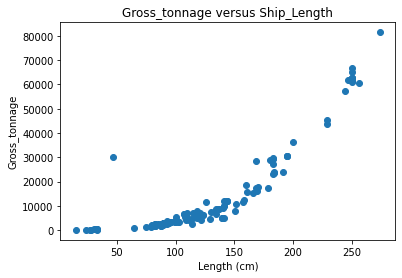

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


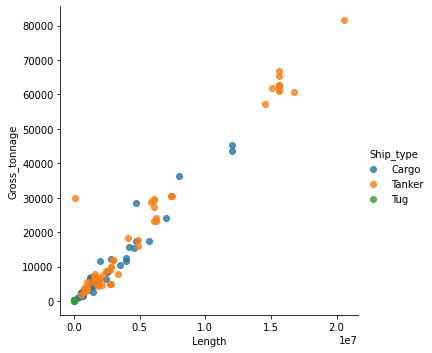

In [ ]:
#Plot Gross tonnage versus the ship Length

import matplotlib.pyplot as plt       
import seaborn as sns            

plt.scatter(data_dummies['Length'], data_dummies['Gross_tonnage'])
plt.title('Gross_tonnage versus Ship_Length')
plt.xlabel('Length (cm)')
plt.ylabel('Gross_tonnage')
plt.show()

data_dummies['Length'] = data_dummies['Length'] ** 3  # Making a Transformation to Length
sns.lmplot('Length', 'Gross_tonnage', data=data_dummies, hue='Ship_type', fit_reg=False)

plt.show()



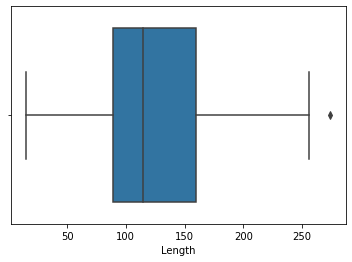

In [ ]:
# Boxplot showing outlier
sns.boxplot(x=df1['Length'])

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MMSI             1.235812e+08
Speed            2.754150e+00
COG              1.017097e+01
Gross_tonnage    1.300700e+04
Length           7.053000e+01
Breadth          1.197750e+01
TLength          3.352756e+06
dtype: float64


In [ ]:
print(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))

     Breadth    COG  Destination  ...  Ship_type  Speed  TLength
0      False  False        False  ...      False  False    False
1      False  False        False  ...      False  False    False
2      False  False        False  ...      False  False    False
3      False  False        False  ...      False  False    False
4      False  False        False  ...      False  False    False
..       ...    ...          ...  ...        ...    ...      ...
129    False  False        False  ...      False  False    False
130    False  False        False  ...      False  False    False
131    False  False        False  ...      False  False    False
132    False  False        False  ...      False  False    False
133    False  False        False  ...      False  False    False

[134 rows x 9 columns]


TypeError: ignored

In [ ]:
from numpy import mean
from numpy import std

# calculate summary statistics
df1_mean, df1_std = mean(df1), std(df1)
# identify outliers
cut_off = df1_std * 3
lower, upper = df1_mean - cut_off, df1_mean + cut_off
# identify outliers

outliers = df1[(df1['Length'] < lower or df1[(df1['Length']  > upper) & (df1['Ship_type']=="Tanker")]

print('Identified outliers: %d' % len(outliers))



SyntaxError: ignored

In [ ]:
outliers = df1[(df1['Length'] < 51) & (df1['Ship_type']=="Tanker")]

outliers

Groos tonnage in the figure below is not the same as the one shown by the outlier


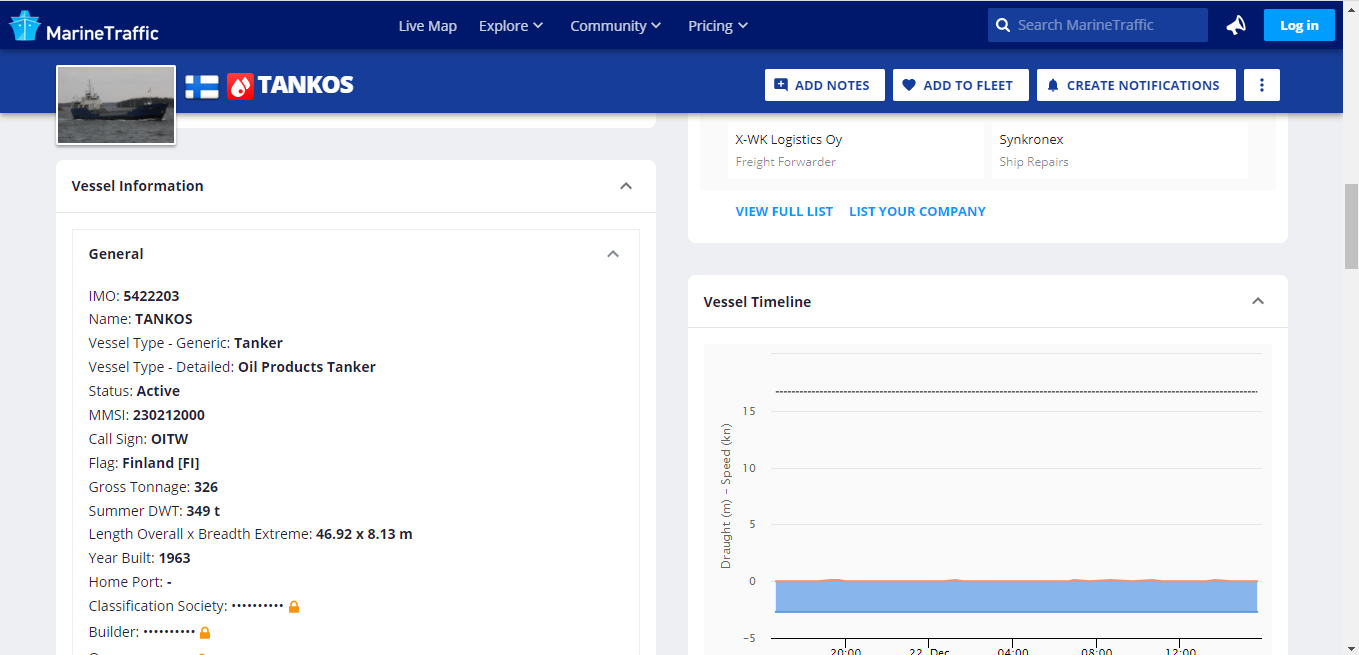

Gross tonnage is unitless measure that calculates the moulded volume of all enclosed spaces of a ship

In [ ]:
#  perform Z-score standardization for Speed, transformed length(TLength), and Breadth 

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df1[['Speed','TLength','Breadth']])



z_score= std_scale.transform(df1[['Speed','TLength','Breadth']])

z_score


array([[-0.16129924, -0.56930326, -0.48910449],
       [ 1.58020874, -0.40589218, -0.22069643],
       [-0.26210202, -0.13793254,  0.17283419],
       [ 0.59233128, -0.13793254,  0.1425626 ],
       [ 0.75502418, -0.53804075, -0.52341229],
       [ 0.66403952, -0.3578443 , -0.422507  ],
       [-1.07217387, -0.53771115, -0.37205436],
       [-0.18098688, -0.63337992, -0.79585656],
       [-0.65760255, -0.19071875, -0.10869156],
       [ 0.02282902, -0.39014519, -0.38214489],
       [-1.030177  , -0.3419153 , -0.06631134],
       [-0.08465624, -0.15100195,  0.19806051],
       [-0.45810455, -0.6079367 , -0.88566226],
       [-0.28178966, -0.20388736,  1.19197758],
       [-0.93836988, -0.63382991, -0.7756755 ],
       [ 1.24711237, -0.4763605 , -0.42957037],
       [ 0.59659779, -0.53804075, -0.52341229],
       [ 1.18218942, -0.3419153 , -0.09658293],
       [ 0.05552181, -0.48808456, -0.17831621],
       [-0.88048925, -0.75670024, -1.53246515],
       [-1.28842949, -0.63432365, -0.775

## Classification accuracy with random training and test sets

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using *random training and test sets*. <br>
 - Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (20%) and test (80%) sets
     - Do you need to use stratification? Explain your decision
 - Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**

In [ ]:
#Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)

des = pd.get_dummies(df1['Destination'], prefix='Des')

X = data_dummies[['Speed','Length','Breadth'] + list(des)].values

               
y = df1['Ship_type'].values

print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (134, 20)  y.shape: (134,)


In [ ]:
# Divide the data randomly into training (20%) and test (80%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y,random_state=20)

I added Stratification bacuse of the type of classes

In [ ]:
# standardize the data before training the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the model and test its performance i.e Training the KNN model

from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Checking how well the trained model performed

y_pred=KNN_model.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test,y_pred)))

Accuracy=0.6944444444444444


In [ ]:
# Print out confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

cmat = confusion_matrix(y_test, y_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

print(classification_report(y_test, y_pred))

TP - True Negative 43
FP - False Positive 11
FN - False Negative 15
TP - True Positive 32
Accuracy Rate: 0.6944444444444444
Misclassification Rate: 0.24074074074074073
              precision    recall  f1-score   support

       Cargo       0.66      0.80      0.72        54
      Tanker       0.74      0.68      0.71        47
         Tug       0.00      0.00      0.00         7

    accuracy                           0.69       108
   macro avg       0.47      0.49      0.48       108
weighted avg       0.65      0.69      0.67       108



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cargo has the highest f1 score, followed by Tanker.

The total classification accuracy is 69% and the misclassfication rate is 24%

Just for discussion

In [ ]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,3):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [ ]:
# Calculating the best K value that gives the maximum F1-Score
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

For each k value, the model performance is evaluated using the f1-score. the performance of the model increases with increase in f1-score.

## Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

The classification accuracy was 80.6%, it has a higher value compared with the one in the previous task. So the classifier that gave the higher performance accuarcy is considered better.

In [ ]:
# Using leave-one-out cross validation to estimate the model performance


from sklearn.model_selection import LeaveOneOut

X = data_dummies[['Speed','Length','Breadth'] + list(des)].values
               
y = df1['Ship_type'].values


X.shape, y.shape

((134, 20), (134,))

In [ ]:
cv = LeaveOneOut()

for i,j in cv.split(x):
    print(i,j)

In [ ]:
# Using leave-one-out cross validation to estimate the model performance
y_true = [] 
y_predt = []

for i, j  in cv.split(x):
    print(i,j)
    X_train, X_test = X[i,:], X[j,:]
    print(X_train)
    print(X_test)
    y_train, y_test = y[i], y[j]
    KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
    KNN_model.fit(X_train,y_train)
    y_pre=KNN_model.predict(X_test)
    y_true.append(y_test[0])
    y_predt.append(y_pre[0])



[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133] [0]
[[1.35256000e+01 1.59750981e+06 1.80000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.94160000e+00 2.81516653e+06 2.19000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.16038000e+01 2.81516653e+06 2.16000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.76680000e+00 2.79428406e+06 1.68600000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.11554000e+01 6.12848700e+06 2.73700000e+01 ... 0.0

In [ ]:



print("Accuracy={}".format(accuracy_score(y_true,y_predt)))

Accuracy=0.8059701492537313


In [ ]:
# Also implementing Loocv using cross_val_score and result was same as above

from sklearn.model_selection import cross_val_score

KNN_model2=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

scores = cross_val_score(KNN_model2,X,y,scoring = 'accuracy', cv=cv)

scores.mean()*100



80.59701492537313

This gave a higher accuracacy value of 80% as compared to the initial value of 69% obtained from random training and test sets approach

## Model selection with leave-one-out cross validation

- Select the best model (kNN with selection of k) using leave-one-out cross validation **2p**
    - Repeat the model performance estimation with values k=1...30
    - Which value of k produces the best classification accuracy?
    - If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?
- Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals1 = range(1, 31)
accuracies1 = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in kVals1:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    KNN_model3 = KNeighborsClassifier(n_neighbors=k) 
   
    # evaluate the model and update the accuracies list
    scores = cross_val_score(KNN_model3, X, y,  cv=cv, scoring = 'accuracy')
    accuracies1.append(scores.mean())
    print("k=%d, accuracy=%.2f%%" % (k, scores.mean() * 100))
    
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies1))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals1[i],
	accuracies1[i] * 100))

k=1, accuracy=79.10%
k=2, accuracy=73.13%
k=3, accuracy=80.60%
k=4, accuracy=76.12%
k=5, accuracy=76.87%
k=6, accuracy=77.61%
k=7, accuracy=76.87%
k=8, accuracy=71.64%
k=9, accuracy=72.39%
k=10, accuracy=74.63%
k=11, accuracy=76.87%
k=12, accuracy=74.63%
k=13, accuracy=73.13%
k=14, accuracy=76.87%
k=15, accuracy=72.39%
k=16, accuracy=71.64%
k=17, accuracy=73.13%
k=18, accuracy=67.16%
k=19, accuracy=65.67%
k=20, accuracy=66.42%
k=21, accuracy=66.42%
k=22, accuracy=64.93%
k=23, accuracy=64.93%
k=24, accuracy=66.42%
k=25, accuracy=66.42%
k=26, accuracy=66.42%
k=27, accuracy=66.42%
k=28, accuracy=66.42%
k=29, accuracy=66.42%
k=30, accuracy=66.42%
k=3 achieved highest accuracy of 80.60% on validation data


Increasing the value of k from 1 to 30, shows that for k = 3 has the highest value of accuracy of 80.6. from k = 1 to 3 shows an increase until k = 3, after the accuracy value decreases and starts to oscillate between 67 and 66%, and from k=24 to 30 the same value of accuracy was obtained, If the value of k is further increased above 30 is still give 66.4% as the limit of accuracy which was previously the same at k=30. This is because KNN classifification depends on the size of data, and since the data isn't large, increasing the value of k as much as 30 does no good to the prediction.

Text(0, 0.5, 'Classification accuracy')

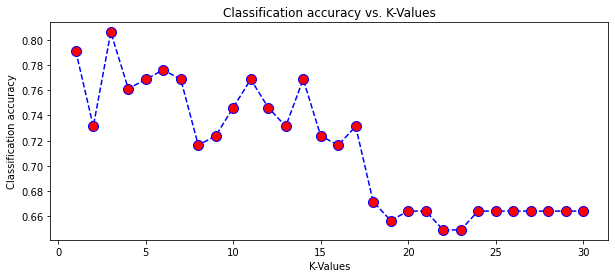

In [ ]:
# Plot of Classification accuracy over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,31), accuracies1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Classification accuracy vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Classification accuracy')

## Testing with training data (this should not be used!)

- Repeat the previous task but use the whole data for training **2p**
    - Plot the resulting classification accuracy versus k=1...30. Include the values from the previous task in the same figure
    - Comment your result. Why shouldn't you test with training data?

In [ ]:
# Testing on training data

KNN_model4=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model4.fit(X_train,y_train)

y_pred=KNN_model4.predict(X_train)

print("Accuracy={}".format(accuracy_score(y_train,y_pred)))

Accuracy=0.8721804511278195


sing this method gave a performance accuracy of 87%

In [ ]:
# Testing on training data

y_true = [] 
y_predt = []

for i, j  in cv.split(x):
    print(i,j)
    X_train, X_test = X[i,:], X[j,:]
    print(X_train)
    print(X_test)
    y_train, y_test = y[i], y[j]
    KNN_model5=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
    KNN_model5.fit(X_train,y_train)
    y_pre=KNN_model5.predict(X_train)
    y_true.append(y_train[0])
    y_predt.append(y_pre[0])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133] [0]
[[1.35256000e+01 1.59750981e+06 1.80000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.94160000e+00 2.81516653e+06 2.19000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.16038000e+01 2.81516653e+06 2.16000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.76680000e+00 2.79428406e+06 1.68600000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.11554000e+01 6.12848700e+06 2.73700000e+01 ... 0.0

In [ ]:
print("Accuracy={}".format(accuracy_score(y_true,y_predt)))

In [ ]:
# Testing on training data

accuracies2 = []
for k in range(1,31):
    
    KNN_model6 = KNeighborsClassifier(n_neighbors=k)
    KNN_model6.fit(X_train, y_train)
    pred_k = KNN_model6.predict(X_train)
    accuracies2.append(np.mean(pred_k != y_train))

Text(0, 0.5, 'Classification accuracy')

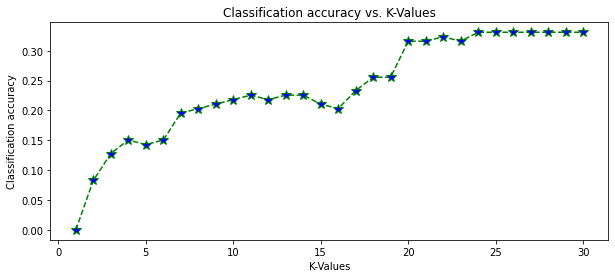

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(1,31), accuracies2, color='green', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Classification accuracy vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Classification accuracy')

training and testing on the training data gave an accuracy performance of 100%, and there is the possibility of overfitting since the model is testing on the same data.

Text(0, 0.5, 'Classification accuracy')

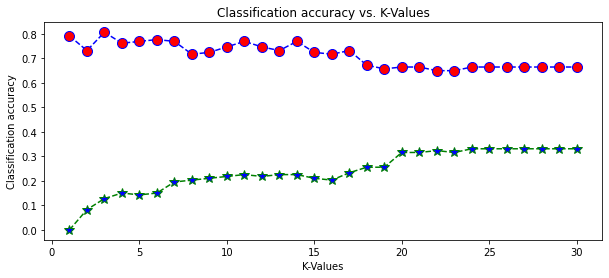

In [ ]:
# Plot the resulting classification accuracy versus k=1...30. Include the values from the previous task in the same figure

plt.figure(figsize=(10,4))
plt.plot(range(1,31), accuracies1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,31), accuracies2, color='green', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Classification accuracy vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Classification accuracy')

References

1. https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

2. https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/

3. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

4. https://www.bitdegree.org/learn/pandas-groupby

5. https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/

6. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

7. https://medium.com/analytics-vidhya/a-beginners-guide-to-k-nearest-neighbor-knn-algorithm-with-code-5015ce8b227e

8. https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/ch04.html

9. https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

10. https://gurus.pyimagesearch.com/lesson-sample-k-nearest-neighbor-classification/

11. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

12. https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/